## Compute Drawdowns

In [1]:
import pandas as pd


me_m = pd.read_csv(
    "data/Portfolios_Formed_on_ME_monthly_EW.csv", 
    header=0, 
    index_col=0, 
    parse_dates=True, 
    na_values=-99.99
)
rets = me_m[["Lo 10", "Hi 10"]]
rets.columns = ["SmallCap", "LargeCap"]
rets = rets / 100
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

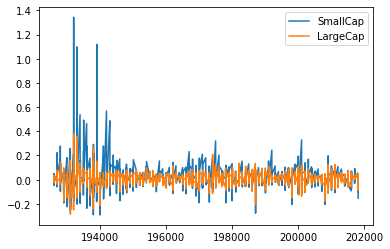

In [2]:
rets.plot.line()

In [3]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 192607 to 201812
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [4]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [5]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [6]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [8]:
rets.index = rets.index.to_period("M")
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<AxesSubplot:>

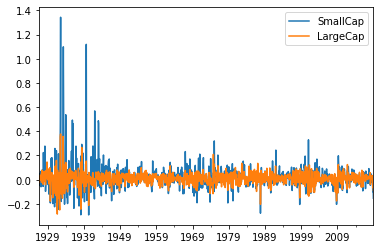

In [17]:
rets.plot.line()

In [10]:
rets.loc["1975"]

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [11]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks 
3. Compute drawdown - wich is the wealth value as a percentage of the previous peak. 

In [12]:
wealth_index = 1_000 * (1 + rets["LargeCap"]).cumprod()
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

<AxesSubplot:>

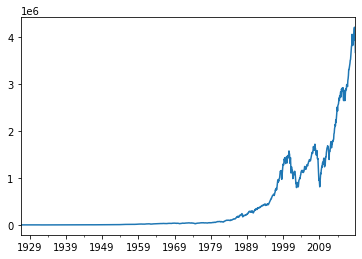

In [13]:
wealth_index.plot.line()

<AxesSubplot:>

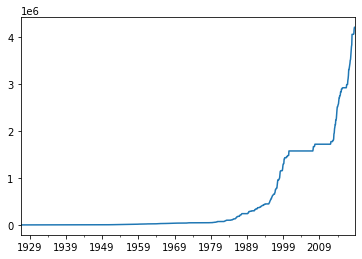

In [15]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

<AxesSubplot:>

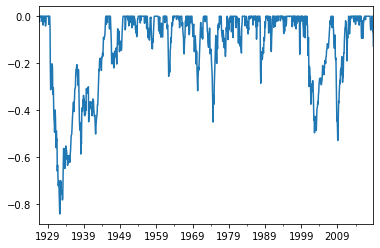

In [16]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot.line()

In [18]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [19]:
drawdown.min()

-0.8400375277943123

In [20]:
drawdown.max()

0.0

In [22]:
drawdown.loc["1975":].min()

-0.5280945042309304

In [23]:
drawdown.loc["1975":].idxmin()

Period('2009-02', 'M')

In [24]:
drawdown.idxmin()

Period('1932-05', 'M')

# Define a function to calculate drawdown

In [25]:
def calculate_drawdown(input_series: pd.Series):
    """
    It takes a time series of returns 
    Computes and returns a DataFrame that contains:
        - Wealth indedx
        - Previous peaks
        - Percent drawdowns
    """
    wealth_index = 1_000 * (1 + input_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    output_data = pd.DataFrame(
        {
            "wealth": wealth_index, 
            "peaks": previous_peaks, 
            "drawdown": drawdowns
        }
    )
    return output_data
    

In [28]:
large_cap_drawdown = calculate_drawdown(rets["LargeCap"])

In [29]:
large_cap_drawdown.head()

,wealth,peaks,drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<AxesSubplot:>

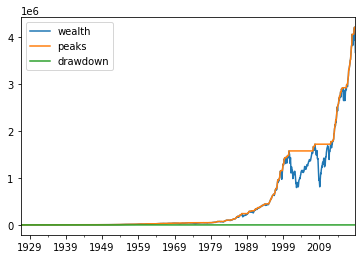

In [30]:
large_cap_drawdown.plot()

In [31]:
small_cap_drawdown = calculate_drawdown(rets["SmallCap"])
small_cap_drawdown.head()

,wealth,peaks,drawdown
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


<AxesSubplot:>

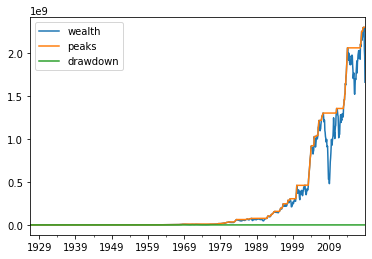

In [32]:
small_cap_drawdown.plot()

<AxesSubplot:>

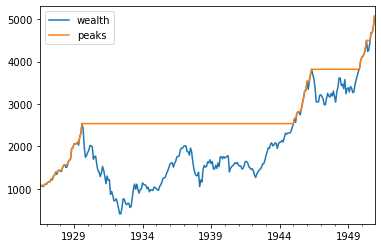

In [36]:
calculate_drawdown(rets["LargeCap"].loc[:"1950"])[["wealth", "peaks"]].plot()

In [38]:
calculate_drawdown(rets["LargeCap"])["drawdown"].min()

-0.8400375277943123

In [40]:
calculate_drawdown(rets["LargeCap"])["drawdown"].idxmin()

Period('1932-05', 'M')

In [39]:
calculate_drawdown(rets["SmallCap"])["drawdown"].min()

-0.8330007793945303

In [41]:
calculate_drawdown(rets["SmallCap"])["drawdown"].idxmin()

Period('1932-05', 'M')

In [43]:
calculate_drawdown(rets["SmallCap"].loc["1940":])["drawdown"].min()

-0.7000596091967917

In [42]:
calculate_drawdown(rets["SmallCap"].loc["1940":])["drawdown"].idxmin()

Period('1974-12', 'M')